In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import json
import music21
from fastai.text import *
import glob
import os
from tqdm import tqdm
from IPython.display import Image, Audio

In [13]:
from midi_data import *

In [4]:
path = Path('../data/midi')

In [5]:
directories = [x for x in path.iterdir() if x.is_dir()]; directories

[PosixPath('../data/midi/cprato_midi'),
 PosixPath('../data/midi/Wikifonia'),
 PosixPath('../data/midi/transposed'),
 PosixPath('../data/midi/hymn'),
 PosixPath('../data/midi/classic_piano_scrape'),
 PosixPath('../data/midi/touhou_scrape'),
 PosixPath('../data/midi/hooktheory'),
 PosixPath('../data/midi/ecomp_midi'),
 PosixPath('../data/midi/freemidi_scrape'),
 PosixPath('../data/midi/piano_e_competition'),
 PosixPath('../data/midi/midiworld_scrape')]

In [9]:
hook_path = path/'hooktheory'
song_list_path = 'song_list_metadata.json'

In [10]:
hooktheory_list = json.load(open(song_list_path, 'r'))

In [11]:
hooktheory_list

[{'artist': 'wayne-sharpe',
  'section': 'chorus',
  'original_path': '../data/midi/hooktheory/pianoroll/w/wayne-sharpe/yu-gi-oh-theme-song/chorus_key.mid',
  'parts': ['intro', 'chorus'],
  'song_url': 'https://www.hooktheory.com/theorytab/view/wayne-sharpe/yu-gi-oh-theme-song',
  'genres': [],
  'title': 'yu-gi-oh3',
  'mode': '1',
  'instruments': ['Piano', 'Piano'],
  'bpm': 128.0,
  'inferred_key': 'C major',
  'seconds': 15.0,
  'time_signature': '4/4',
  'inferred_keyc': 'C major',
  'midi_keyc': '../data/midi/transposed/hooktheory/pianoroll/w/wayne-sharpe/yu-gi-oh-theme-song/chorus_key.mid'},
 {'artist': 'wayne-sharpe',
  'section': 'intro',
  'original_path': '../data/midi/hooktheory/pianoroll/w/wayne-sharpe/yu-gi-oh-theme-song/intro_key.mid',
  'parts': ['intro', 'chorus'],
  'song_url': 'https://www.hooktheory.com/theorytab/view/wayne-sharpe/yu-gi-oh-theme-song',
  'genres': [],
  'title': 'yu-gi-oh',
  'mode': '1',
  'instruments': ['Piano'],
  'bpm': 85.0,
  'inferred_key'

### Clara encoding

In [12]:
from data_utils import midi_to_encoding

In [17]:
song_info = hooktheory_list[800]; song_info

{'artist': 'jam-project',
 'section': 'pre-chorus',
 'original_path': '../data/midi/hooktheory/pianoroll/j/jam-project/victory/pre-chorus_key.mid',
 'parts': ['verse', 'pre-chorus', 'chorus'],
 'song_url': 'https://www.hooktheory.com/theorytab/view/jam-project/victory',
 'genres': ['J-Pop', 'Video Game'],
 'title': 'victory 2',
 'mode': '6',
 'instruments': ['Piano', 'Piano'],
 'bpm': 164.0,
 'inferred_key': 'C major',
 'seconds': 37.68292682926829,
 'time_signature': '4/4',
 'inferred_keyc': 'C major',
 'midi_keyc': '../data/midi/transposed/hooktheory/pianoroll/j/jam-project/victory/pre-chorus_key.mid'}

In [19]:
stream = file2stream(song_info['midi_keyc'])

In [20]:
stream.show('midi')

In [25]:
n = music21.note.Note()

In [30]:
n.pitch.

261.6255653005985

In [33]:
note_range = 62
if note_range == 38: note_offset = 45 
if note_range == 62: note_offset = 33 

In [35]:

noteFilter=music21.stream.filters.ClassFilter('Note')
chordFilter=music21.stream.filters.ClassFilter('Chord')

In [37]:
notes = stream.recurse().addFilter(noteFilter)

In [56]:
stream[1].analyze('key')

<music21.key.Key of C major>

In [59]:
list(stream[1].flat)

[<music21.instrument.Piano Piano>,
 <music21.instrument.Piano Piano>,
 <music21.key.Key of D major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord B2 D3 G3>,
 <music21.chord.Chord A2 C3 E3>,
 <music21.chord.Chord G2 C3 E3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord B2 D3 G3>,
 <music21.chord.Chord B-2 D3 E3 G3>,
 <music21.chord.Chord A2 C3 F3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord B2 D3 G3>,
 <music21.chord.Chord A2 C3 E3>,
 <music21.chord.Chord G2 C3 E3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord B2 D3 G3>,
 <music21.chord.Chord B-2 D3 E3 G3>,
 <music21.chord.Chord A2 C3 F3>,
 <music21.chord.Chord C#3 E3 A3>,
 <music21.chord.Chord D3 F3 A3>,
 <music21.chord.Chord D3 F3 A3>,
 <music21.chord.Chord E3 G3 C4>,
 <music21.chord.Chord F3 A3 C4>,
 <music21.chord.Chord B-2 D3 F3>,
 <music21.chord.Chord C3 F3 G3>,
 <music21.chord.Chord C3 E3 G3>,
 <music21.chord.Chord C#3 E3 G3 A3>,
 <music21.chord.Chord D3

In [60]:
k = stream.flat.analyze('key')

In [61]:
k.correlationCoefficient

0.9608772858003879

In [67]:
k.tonalCertainty()

1.336619918331381

In [65]:
k.alternateInterpretations[0].correlationCoefficient

0.7730059695348914

In [62]:
k.alternateInterpretations

[<music21.key.Key of d minor>,
 <music21.key.Key of F major>,
 <music21.key.Key of a minor>,
 <music21.key.Key of g minor>,
 <music21.key.Key of G major>,
 <music21.key.Key of c minor>,
 <music21.key.Key of e minor>,
 <music21.key.Key of B- major>,
 <music21.key.Key of D major>,
 <music21.key.Key of f minor>,
 <music21.key.Key of E- major>,
 <music21.key.Key of A major>,
 <music21.key.Key of b minor>,
 <music21.key.Key of A- major>,
 <music21.key.Key of b- minor>,
 <music21.key.Key of E major>,
 <music21.key.Key of c# minor>,
 <music21.key.Key of f# minor>,
 <music21.key.Key of C# major>,
 <music21.key.Key of B major>,
 <music21.key.Key of e- minor>,
 <music21.key.Key of F# major>,
 <music21.key.Key of g# minor>]

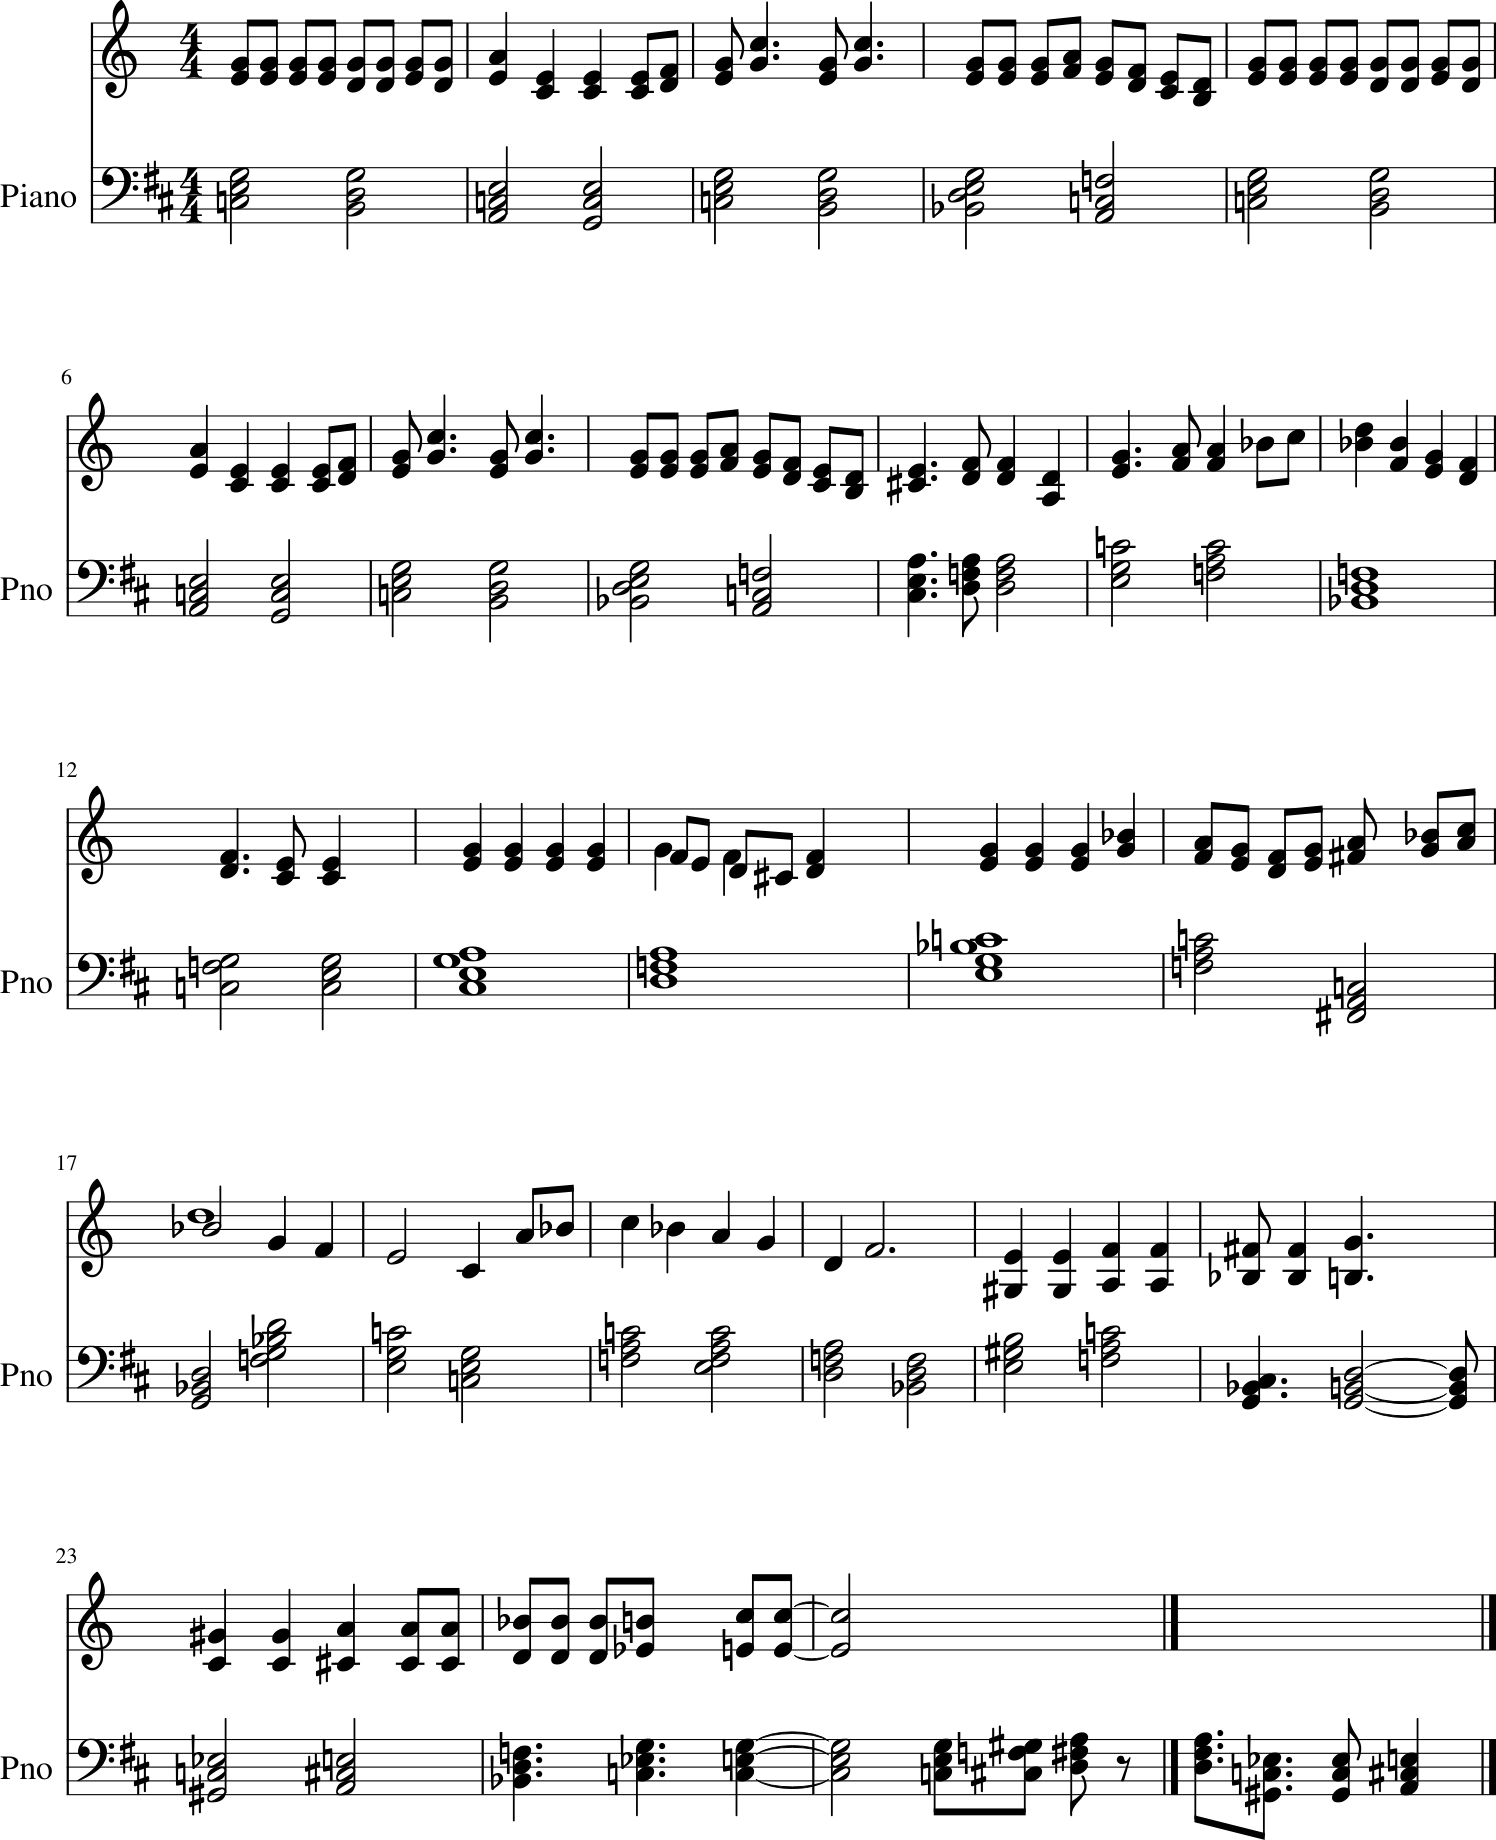

In [40]:
stream.show()

In [39]:
[n.nameWithOctave for n in notes]

['B-4',
 'C5',
 'F4',
 'E4',
 'D4',
 'C#4',
 'B-4',
 'G4',
 'F4',
 'E4',
 'C4',
 'A4',
 'B-4',
 'C5',
 'B-4',
 'A4',
 'G4',
 'D4',
 'F4',
 'G4',
 'F4',
 'D5']

In [45]:
c = list(stream.flat)[10]

In [46]:
c.pitches

(<music21.pitch.Pitch C3>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch G3>)

In [47]:
c.duration

<music21.duration.Duration 2.0>

In [51]:
p = c.pitches[0]

In [53]:
p.nameWithOctave

'C3'

In [ ]:
# assuming 4/4 time
def stream_to_chordwise(s, note_range, note_offset, sample_freq=4, max_instruments=2):  
    maxTimeStep = floor(s.duration.quarterLength * sample_freq)+1
    score_arr = np.zeros((maxTimeStep, max_instruments, note_range))

    notes=[]
    instrumentID=0
    
    noteFilter=music21.stream.filters.ClassFilter('Note')
    chordFilter=music21.stream.filters.ClassFilter('Chord')

    for n in s.recurse().addFilter(noteFilter):
        if max_instruments:
            instrumentID=assign_instrument(n.activeSite.getInstrument())
            if instrumentID==-1:
                return []
        notes.append((n.pitch.midi-note_offset, floor(n.offset*sample_freq), floor(n.duration.quarterLength*sample_freq), instrumentID))
        
    for c in s.recurse().addFilter(chordFilter):
        pitchesInChord=c.pitches
        if max_instruments:
            instrumentID=assign_instrument(n.activeSite.getInstrument())     
            if instrumentID==-1:
                return []

        for p in pitchesInChord:
            notes.append((p.midi-note_offset, floor(c.offset*sample_freq), floor(c.duration.quarterLength*sample_freq), instrumentID))

    for n in notes:
        pitch=n[0]
        while pitch<0:
            pitch+=12
        while pitch>=note_range:
            pitch-=12
        if n[3]==1:      #Violin lowest note is v22
            while pitch<22:
                pitch+=12
                
        score_arr[n[1], n[3], pitch]=1                  # Strike note
        score_arr[n[1]+1:n[1]+n[2], n[3], pitch]=2      # Continue holding note
            
    instr={}
    instr[0]="p"
    instr[1]="v"
    score_string_arr=[]
    for timestep in score_arr:
        for i in list(reversed(range(len(timestep)))):   # List violin note first, then piano note
            score_string_arr.append(instr[i]+''.join([str(int(note)) for note in timestep[i]]))      

    return score_string_arr

In [34]:
midi_to_encoding.stream_to_chordwise(stream, True, note_range=note_range, note_offset=note_offset, sample_freq=4)

['v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000010001001000000001001000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000002002000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000001001000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000002002000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000001001000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000002002000000000000000000000000000',
 'v00000000000000000000000000000000000000000000000000000000000000',
 'p00000000000000020002002000000001001000000000000000000000000000',
 'v000000000000000000000000000000000000000000000

In [ ]:
# assuming 4/4 time
def stream_to_chordwise(s, note_range, note_offset, sample_freq=4, max_instruments=2):  
    maxTimeStep = floor(s.duration.quarterLength * sample_freq)+1
    score_arr = np.zeros((maxTimeStep, max_instruments, note_range))

    notes=[]
    instrumentID=0
    
    noteFilter=music21.stream.filters.ClassFilter('Note')
    chordFilter=music21.stream.filters.ClassFilter('Chord')

    for n in s.recurse().addFilter(noteFilter):
        if max_instruments:
            instrumentID=assign_instrument(n.activeSite.getInstrument())
            if instrumentID==-1:
                return []
        notes.append((n.pitch.midi-note_offset, floor(n.offset*sample_freq), floor(n.duration.quarterLength*sample_freq), instrumentID))
        
    for c in s.recurse().addFilter(chordFilter):
        pitchesInChord=c.pitches
        if max_instruments:
            instrumentID=assign_instrument(n.activeSite.getInstrument())     
            if instrumentID==-1:
                return []

        for p in pitchesInChord:
            notes.append((p.midi-note_offset, floor(c.offset*sample_freq), floor(c.duration.quarterLength*sample_freq), instrumentID))

    for n in notes:
        pitch=n[0]
        while pitch<0:
            pitch+=12
        while pitch>=note_range:
            pitch-=12
        if n[3]==1:      #Violin lowest note is v22
            while pitch<22:
                pitch+=12
                
        score_arr[n[1], n[3], pitch]=1                  # Strike note
        score_arr[n[1]+1:n[1]+n[2], n[3], pitch]=2      # Continue holding note
            
    instr={}
    instr[0]="p"
    instr[1]="v"
    score_string_arr=[]
    for timestep in score_arr:
        for i in list(reversed(range(len(timestep)))):   # List violin note first, then piano note
            score_string_arr.append(instr[i]+''.join([str(int(note)) for note in timestep[i]]))      

    return score_string_arr